<a href="https://colab.research.google.com/github/punam35/ML-Python/blob/main/Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [ ]:
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# Create a Dataframe for iris
df=pd.DataFrame(data.data,columns=data.feature_names)
df["Types"] = data.target_names[data.target]
df["types"] = data.target
   # to add output/feature(target) name in previous column

df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Types,types
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2,2


In [ ]:
df.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Types

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,types
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
sns.pairplot(df,hue="Types")
plt.show()

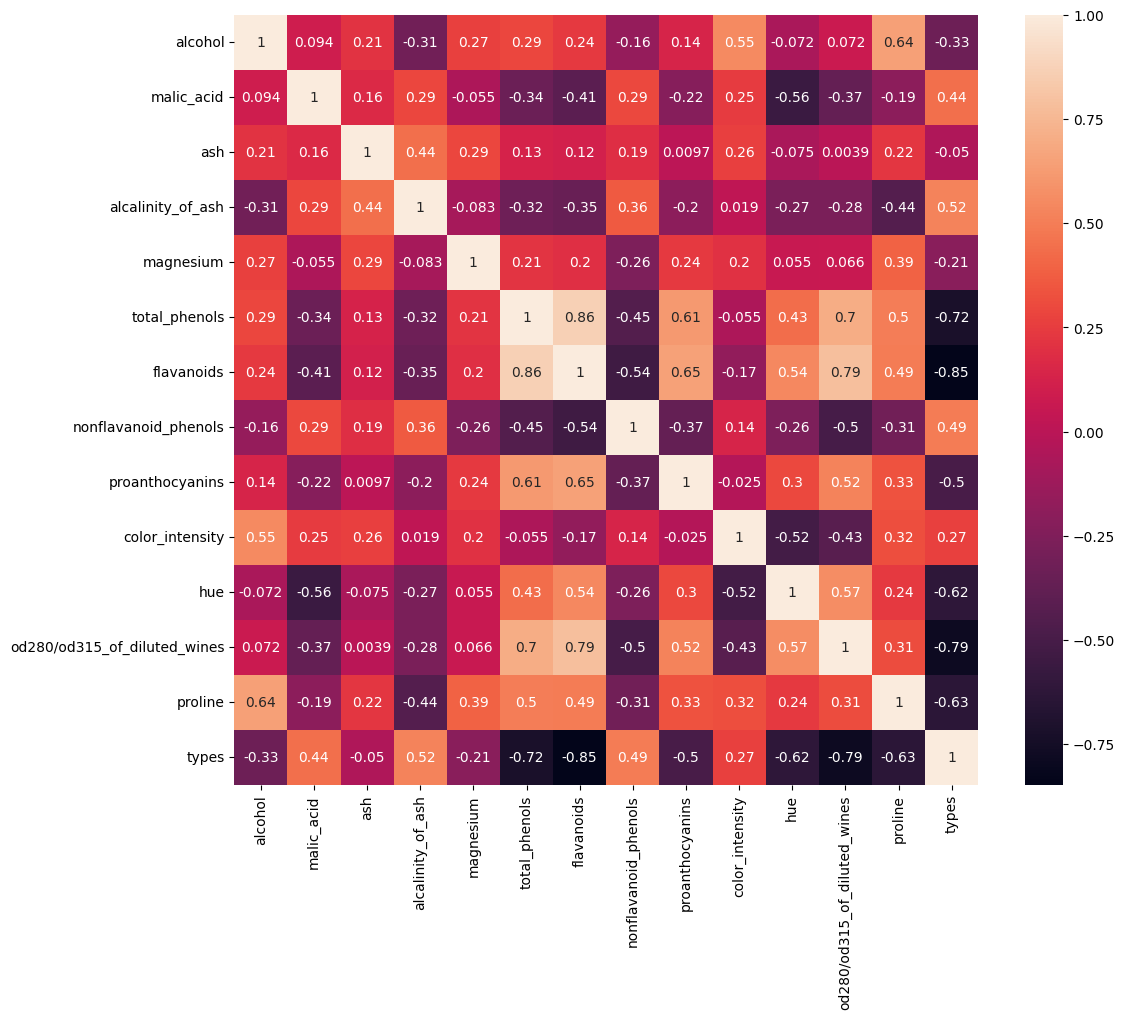

In [ ]:
corr=df.drop("Types",axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Types,types
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,0


In [ ]:
#PREPARING DATA For train-test split using dataframe
X=df.drop(["Types","types"],axis=1)
y=df["types"]
X.shape,y.shape

((178, 13), (178,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20,random_state=40)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
85,12.67,0.98,2.24,18.0,99.0,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450.0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0


In [ ]:
X.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape

((178, 13), (142, 13), (36, 13), (142,), (36,))

In [ ]:
#Creating a dictionary for all classification algorithms
models={
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Logistic Regression":LogisticRegression(),
    "SVM":SVC()
}


In [ ]:
#model selection
results={}
for name, model in models.items():
  scores = cross_val_score(model,X_train,y_train,cv=5)
  results[name]=np.mean(scores)
  print(f"{name}:Mean CV Accuracy={np.mean(scores):.3F}")

Decision Tree:Mean CV Accuracy=0.901
Random Forest:Mean CV Accuracy=0.965


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression:Mean CV Accuracy=0.916
SVM:Mean CV Accuracy=0.683


In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='gini',max_depth=1),X_train,y_train,cv=6)

array([0.58333333, 0.625     , 0.66666667, 0.70833333, 0.60869565,
       0.65217391])

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='entropy',max_depth=1),X_train,y_train,cv=6)

array([0.54166667, 0.625     , 0.66666667, 0.66666667, 0.60869565,
       0.65217391])

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='gini',max_depth=2),X_train,y_train,cv=6)

array([0.79166667, 0.875     , 0.91666667, 0.95833333, 0.86956522,
       0.7826087 ])

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='entropy',max_depth=2),X_train,y_train,cv=6)

array([0.875     , 0.875     , 0.91666667, 0.875     , 0.86956522,
       0.7826087 ])

In [ ]:
maxDepth=[1,2,3,4,5]
crit=["gini","entropy"]
crossValue={}
for i in crit:
  for j in maxDepth:
    value=cross_val_score(DecisionTreeClassifier(criterion=i,max_depth=j),X_train,y_train,cv=5)
    crossValue[i+'_'+str(j)]=np.mean(value)
crossValue


{'gini_1': np.float64(0.6408866995073892),
 'gini_2': np.float64(0.8662561576354679),
 'gini_3': np.float64(0.9017241379310346),
 'gini_4': np.float64(0.9086206896551724),
 'gini_5': np.float64(0.9152709359605911),
 'entropy_1': np.float64(0.6056650246305418),
 'entropy_2': np.float64(0.8443349753694582),
 'entropy_3': np.float64(0.8940886699507388),
 'entropy_4': np.float64(0.8940886699507388),
 'entropy_5': np.float64(0.9009852216748768)}

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(),{
    'max_depth':[1,2,3,4,5],
    'criterion':['gini','entropy']
},cv=5,return_train_score=False)
gs.fit(X_train,y_train)
gs.cv_results_

{'mean_fit_time': array([0.0030333 , 0.00625648, 0.00328879, 0.00359077, 0.00315819,
        0.00271158, 0.00288029, 0.00320144, 0.00308466, 0.00378327]),
 'std_fit_time': array([4.79938165e-04, 1.56206771e-03, 4.48469071e-04, 4.71023293e-04,
        2.52059956e-04, 3.87728723e-05, 7.18701961e-05, 3.59104585e-04,
        8.97450096e-05, 8.75196504e-04]),
 'mean_score_time': array([0.00245538, 0.00346632, 0.00199475, 0.00233212, 0.0020618 ,
        0.00192704, 0.00185566, 0.00189347, 0.00191002, 0.00731711]),
 'std_score_time': array([3.86515700e-04, 9.86404452e-04, 9.03871970e-05, 3.40272500e-04,
        1.78203392e-04, 1.34986494e-04, 3.71457064e-05, 5.14532262e-05,
        7.61072139e-05, 9.84856575e-03]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'entropy',
                    'entropy', 'entropy', 'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_val

In [ ]:
crossValue_df = pd.DataFrame(gs.cv_results_)
display(crossValue_df)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003033,0.000480,0.002455,0.000387,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.620690,0.655172,0.678571,0.607143,0.642857,0.640887,0.025198,9
1,0.006256,0.001562,0.003466,0.000986,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.827586,0.896552,0.928571,0.857143,0.821429,0.866256,0.040961,7
2,0.003289,0.000448,0.001995,0.000090,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.862069,0.931034,0.964286,0.964286,0.892857,0.922906,0.040236,1
3,0.003591,0.000471,0.002332,0.000340,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.862069,0.896552,0.928571,0.964286,0.785714,0.887438,0.061110,6
4,0.003158,0.000252,0.002062,0.000178,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.862069,0.931034,0.964286,0.964286,0.785714,0.901478,0.068873,3
5,0.002712,0.000039,0.001927,0.000135,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.551724,0.655172,0.571429,0.607143,0.642857,0.605665,0.039795,10
6,0.002880,0.000072,0.001856,0.000037,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.896552,0.896552,0.785714,0.857143,0.821429,0.851478,0.043181,8
7,0.003201,0.000359,0.001893,0.000051,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.931034,0.896552,0.821429,0.964286,0.857143,0.894089,0.050879,5
8,0.003085,0.000090,0.001910,0.000076,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.931034,0.965517,0.821429,0.964286,0.857143,0.907882,0.058460,2
9,0.003783,0.000875,0.007317,0.009849,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.931034,0.896552,0.821429,0.964286,0.892857,0.901232,0.047591,4


In [ ]:
crossValue_df[['param_criterion','param_max_depth','mean_test_score']]

,param_criterion,param_max_depth,mean_test_score
0,gini,1,0.640887
1,gini,2,0.866256
2,gini,3,0.922906
3,gini,4,0.887438
4,gini,5,0.901478
5,entropy,1,0.605665
6,entropy,2,0.851478
7,entropy,3,0.894089
8,entropy,4,0.907882
9,entropy,5,0.901232


In [ ]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [ ]:
model=DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2])

In [ ]:
accuracy_score=model.score(X_test,y_test)
accuracy_score

0.9444444444444444